In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np
import seaborn as sns
import pandas as pd
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

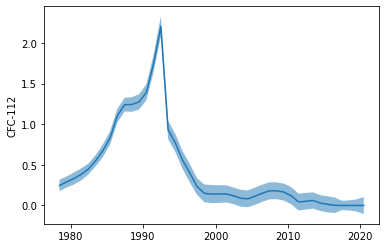

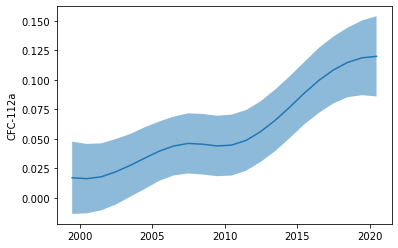

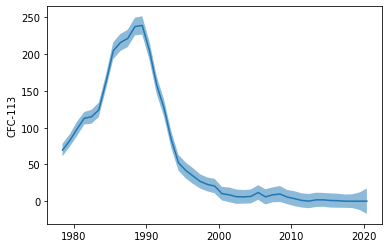

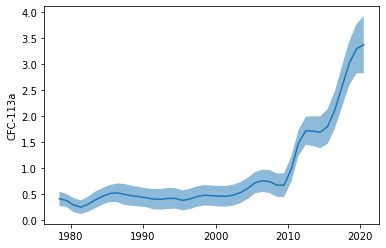

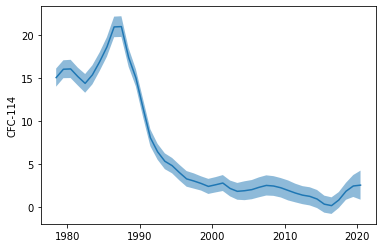

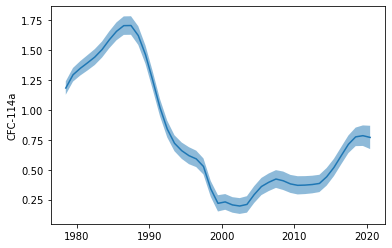

In [2]:
species_list = ["CFC-112", "CFC-112a", "CFC-113","CFC-113a", "CFC-114", "CFC-114a"]
lpath = Path("/user/home/lw13938/work/py12box_laube/data/")
emissions = {}

for species in species_list:

    df = pd.read_csv(lpath / species / f"outputs/{species}_Global_annual_emissions.csv", comment="#")
    emissions[species] = {"date":df.Decimal_date, "emissions":df.Global_annual_emissions,
                            "sd":df["Global_annual_emissions_1-sigma"]} 

    plt.figure()
    plt.plot(df.Decimal_date, df.Global_annual_emissions)
    plt.fill_between(df.Decimal_date, df.Global_annual_emissions+df["Global_annual_emissions_1-sigma"],
                    df.Global_annual_emissions-df["Global_annual_emissions_1-sigma"], alpha=0.5)
    plt.ylabel(species)
    # plt.savefig(f"/user/home/lw13938/work/minorCFCs/Figs/"+pd.to_datetime("today").strftime("%Y-%m-%d")+f"_{species}_emissions.png", dpi=200)

In [3]:
# Load in GWPs etc
# data_dir = Path("/user/home/lw13938/work/scripts_py12box/OzoneAssessment2022/data/")
# gwps = pd.read_csv(data_dir / "SAOD22_GWP.csv",
#                   skiprows = 1, skipinitialspace = True, index_col = "Gas")["GWP"]
# gwps = pd.read_csv("/user/home/lw13938/work/py12box_agage/data/ancillary/GWP.csv",
#                   comment="#", skipinitialspace = True, index_col = "Species")["GWP"]
# odps = pd.read_csv(data_dir /  "mr_ODP.csv",
#                   skiprows = 1, skipinitialspace = True, index_col = "Species")["WMO2018"]
gwps = {"CFC-13":17200, "CFC-112":4880, "CFC-112a":3740, 
        "CFC-113":6900,"CFC-113a":4140, "CFC-114":9990, 
        "CFC-114a":7850, "CFC-115":10200}
odps = {"CFC-13":1, "CFC-112":0.98, "CFC-112a":0.86, 
        "CFC-113":0.815,"CFC-113a":0.73, "CFC-114":0.5, 
        "CFC-114a":0.72, "CFC-115":0.26}
    

Text(0.5, 0, 'Date')

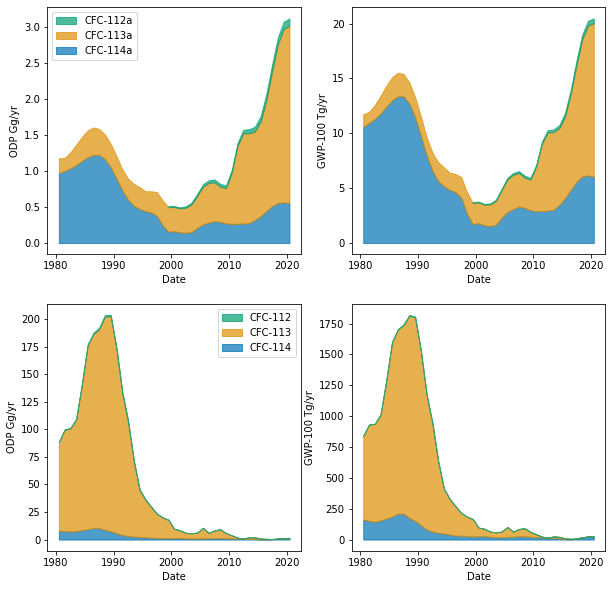

In [4]:
clrs = sns.color_palette('colorblind',6)
#clrs =  ["#d55e00","#cc79a7","#0072b2","#f0e442","#009e73","#b66dff"]
species_list = ["CFC-112a", "CFC-113a", "CFC-114a"][::-1] 
total_odp = pd.DataFrame(data = {"odp": np.zeros(41)},
                          index = np.arange(1980.5, 2020.51))
total_gwp = pd.DataFrame(data = {"gwp": np.zeros(41)},
                          index = np.arange(1980.5, 2020.51))

fig, ax = plt.subplots(2,2, figsize=(10,10))
for s, species in enumerate(species_list):

    dfodp = pd.DataFrame(data = {"odp":emissions[species]["emissions"].values*odps[species]},
                            index = emissions[species]["date"].values + 0.04).reindex_like(total_odp, method = "ffill")
    dfgwp = pd.DataFrame(data = {"gwp":emissions[species]["emissions"].values*gwps[species]*1e-3},
                            index = emissions[species]["date"].values + 0.04).reindex_like(total_gwp, method = "ffill")
    lowerodp = total_odp.odp.values
    lowergwp = total_gwp.gwp.values
    total_odp = total_odp.add(dfodp)
    total_gwp = total_gwp.add(dfgwp)
    ax[0,0].fill_between(total_odp.index,lowerodp, total_odp.odp.values, label=species, 
                        alpha=0.7, color=clrs[s])
    ax[0,1].fill_between(total_gwp.index,lowergwp, total_gwp.gwp.values, label=species, 
                        alpha=0.7, color=clrs[s])

species_list = ["CFC-112", "CFC-113", "CFC-114"][::-1]                        
total_odp = pd.DataFrame(data = {"odp": np.zeros(41)},
                          index = np.arange(1980.5, 2020.51))
total_gwp = pd.DataFrame(data = {"gwp": np.zeros(41)},
                          index = np.arange(1980.5, 2020.51))
for s, species in enumerate(species_list):

    dfodp = pd.DataFrame(data = {"odp":emissions[species]["emissions"].values*odps[species]},
                            index = emissions[species]["date"].values + 0.04).reindex_like(total_odp, method = "ffill")
    dfgwp = pd.DataFrame(data = {"gwp":emissions[species]["emissions"].values*gwps[species]*1e-3},
                            index = emissions[species]["date"].values + 0.04).reindex_like(total_gwp, method = "ffill")
    lowerodp = total_odp.odp.values
    lowergwp = total_gwp.gwp.values
    total_odp = total_odp.add(dfodp)
    total_gwp = total_gwp.add(dfgwp)
    ax[1,0].fill_between(total_odp.index,lowerodp, total_odp.odp.values, label=species, 
                        alpha=0.7, color=clrs[s])
    ax[1,1].fill_between(total_gwp.index,lowergwp, total_gwp.gwp.values, label=species, 
                        alpha=0.7, color=clrs[s])
    #print(f"Max ODP {species} = {dfodp.max()}")

handles, labels = ax[0,0].get_legend_handles_labels()
ax[0,0].legend(handles[::-1], labels[::-1],loc="upper left")
ax[0,0].set_ylabel("ODP Gg/yr")
ax[0,1].set_ylabel("GWP-100 Tg/yr")
ax[0,0].set_xlabel("Date")
ax[0,1].set_xlabel("Date")
handles, labels = ax[1,0].get_legend_handles_labels()
ax[1,0].legend(handles[::-1], labels[::-1])
ax[1,0].set_ylabel("ODP Gg/yr")
ax[1,1].set_ylabel("GWP-100 Tg/yr")
ax[1,0].set_xlabel("Date")
ax[1,1].set_xlabel("Date")

# plt.savefig(f"/user/home/lw13938/work/minorCFCs/Figs/"+pd.to_datetime("today").strftime("%Y-%m-%d")+f"_odpgwp_emissions.png"), dpi=200)


# Make plot for paper

In [5]:
species_list = ["CFC-13","CFC-112a","CFC-113a", "CFC-114a",  "CFC-115"]

emissions = {}

for species in species_list:

    if species != "CFC-13" and species != "CFC-115":
        lpath = Path("/user/home/lw13938/work/py12box_laube/data/")
    else:
        lpath = Path("/user/home/lw13938/work/py12box_laube/data_allagage/")

    df = pd.read_csv(lpath / species / f"outputs/{species}_Global_annual_emissions.csv", comment="#")
    emissions[species] = {"date":df.Decimal_date, "emissions":df.Global_annual_emissions,
                            "sd":df["Global_annual_emissions_1-sigma"]} 

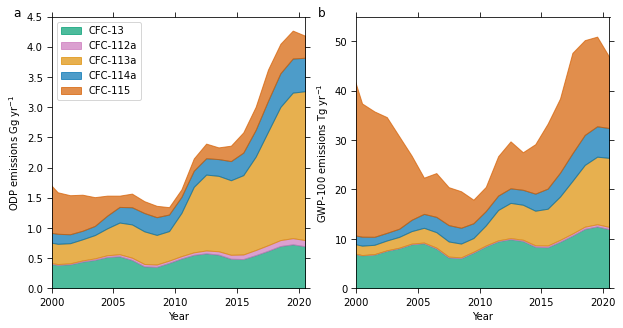

In [6]:
# clrs = sns.color_palette('colorblind',5)
# np.random.shuffle(clrs)
clrs = [(0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
 (0.8, 0.47058823529411764, 0.7372549019607844),
 (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),
 (0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
 (0.8352941176470589, 0.3686274509803922, 0.0)]
#clrs =  ["#d55e00","#cc79a7","#0072b2","#f0e442","#009e73","#b66dff"]
species_list = ["CFC-13", "CFC-112a", "CFC-113a", "CFC-114a", "CFC-115"]#[::-1] 
total_odp = pd.DataFrame(data = {"odp": np.zeros(41)},
                          index = np.arange(1980.5, 2020.51))
total_gwp = pd.DataFrame(data = {"gwp": np.zeros(41)},
                          index = np.arange(1980.5, 2020.51))

fig, ax = plt.subplots(1,2, figsize=(10,5))
for s, species in enumerate(species_list):

    dfodp = pd.DataFrame(data = {"odp":emissions[species]["emissions"].values*odps[species]},
                            index = emissions[species]["date"].values + 0.04).reindex_like(total_odp, method = "ffill")
    dfgwp = pd.DataFrame(data = {"gwp":emissions[species]["emissions"].values*gwps[species]*1e-3},
                            index = emissions[species]["date"].values + 0.04).reindex_like(total_gwp, method = "ffill")
    lowerodp = total_odp.odp.values
    lowergwp = total_gwp.gwp.values
    total_odp = total_odp.add(dfodp)
    total_gwp = total_gwp.add(dfgwp)
    ax[0].fill_between(total_odp.index,lowerodp, total_odp.odp.values, label=species, 
                        alpha=0.7, color=clrs[s])
    ax[1].fill_between(total_gwp.index,lowergwp, total_gwp.gwp.values, label=species, 
                        alpha=0.7, color=clrs[s])

handles, labels = ax[0].get_legend_handles_labels()
# ax[0].legend(handles[::-1], labels[::-1],loc="upper left")
ax[0].legend(handles, labels,loc="upper left")
ax[0].set_ylabel("ODP emissions Gg yr$^{-1}$")
ax[1].set_ylabel("GWP-100 emissions Tg yr$^{-1}$")
ax[0].set_xlabel("Year")
ax[1].set_xlabel("Year")
ax[0].set_xlim(2000,2020.5)
ax[1].set_xlim(2000,2020.5)
ax[0].set_ylim(0,4.5)
ax[1].set_ylim(0,55)

ax[0].text(-0.15,1.,"a",transform = ax[0].transAxes, fontsize=12)
ax[1].text(-0.15,1.,"b",transform = ax[1].transAxes, fontsize=12)

ax[0].tick_params(right=True, top=True, labelrotation=0, length=5)
ax[1].tick_params(right=True, top=True, labelrotation=0, length=5)

plt.savefig(f"/user/home/lw13938/work/minorCFCs/Figs/"+pd.to_datetime("today").strftime("%Y-%m-%d")+f"_Fig2_odpgwp_emissions.pdf") #, dpi=200)


# Now do this for AGAGE CFC-115, -114 and -13

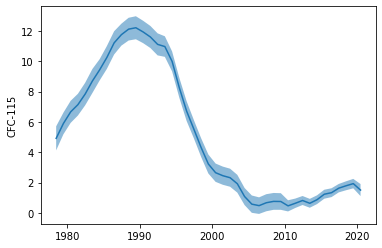

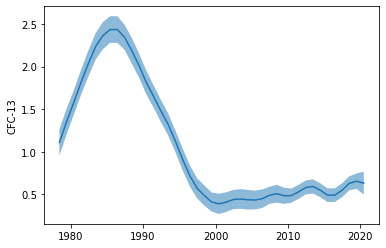

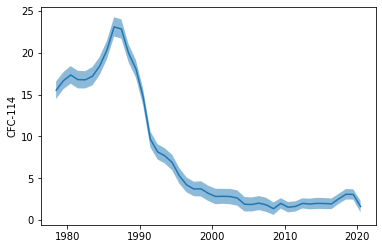

In [6]:
species_list = ["CFC-115", "CFC-13", "CFC-114"]
lpath = Path("/user/home/lw13938/work/py12box_laube/data_agage/")
emissions = {}

for species in species_list:

    df = pd.read_csv(lpath / species / f"outputs/{species}_Global_annual_emissions.csv", comment="#")
    emissions[species] = {"date":df.Decimal_date, "emissions":df.Global_annual_emissions,
                            "sd":df["Global_annual_emissions_1-sigma"]} 

    plt.figure()
    plt.plot(df.Decimal_date, df.Global_annual_emissions)
    plt.fill_between(df.Decimal_date, df.Global_annual_emissions+df["Global_annual_emissions_1-sigma"],
                    df.Global_annual_emissions-df["Global_annual_emissions_1-sigma"], alpha=0.5)
    plt.ylabel(species)
    # plt.savefig(f"/user/home/lw13938/work/minorCFCs/Figs/"+pd.to_datetime("today").strftime("%Y-%m-%d")+f"_{species}_agage_emissions.png", dpi=200)

Text(0.5, 0, 'Date')

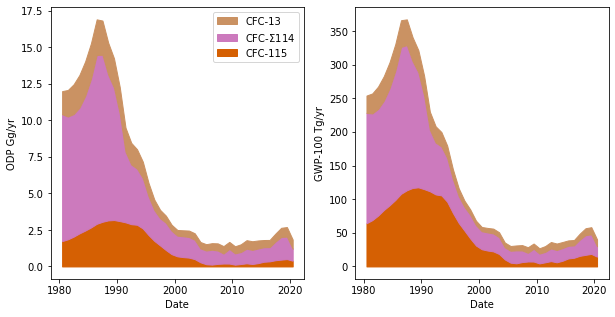

In [7]:
species_list = ["CFC-13", "CFC-114", "CFC-115"][::-1] 
total_odp = pd.DataFrame(data = {"odp": np.zeros(41)},
                          index = np.arange(1980.5, 2020.51))
total_gwp = pd.DataFrame(data = {"gwp": np.zeros(41)},
                          index = np.arange(1980.5, 2020.51))

fig, ax = plt.subplots(1,2, figsize=(10,5))
for s, species in enumerate(species_list):

    dfodp = pd.DataFrame(data = {"odp":emissions[species]["emissions"].values*odps[species]},
                            index = emissions[species]["date"].values + 0.04).reindex_like(total_odp, method = "nearest")
    dfgwp = pd.DataFrame(data = {"gwp":emissions[species]["emissions"].values*gwps[species]*1e-3},
                            index = emissions[species]["date"].values + 0.04).reindex_like(total_gwp, method = "nearest")
    lowerodp = total_odp.odp.values
    lowergwp = total_gwp.gwp.values
    total_odp = total_odp.add(dfodp)
    total_gwp = total_gwp.add(dfgwp)
    ax[0].fill_between(total_odp.index,lowerodp, total_odp.odp.values, label=species, 
                        alpha=0.99, color=clrs[s+3])
    ax[1].fill_between(total_gwp.index,lowergwp, total_gwp.gwp.values, label=species, 
                        alpha=0.99, color=clrs[s+3])


handles, labels = ax[0].get_legend_handles_labels()
labels[1] = "CFC-$\Sigma$114"
ax[0].legend(handles[::-1], labels[::-1],loc="upper right")
ax[0].set_ylabel("ODP Gg/yr")
ax[1].set_ylabel("GWP-100 Tg/yr")
ax[0].set_xlabel("Date")
ax[1].set_xlabel("Date")

# plt.savefig(f"/user/home/lw13938/work/minorCFCs/Figs/"+pd.to_datetime("today").strftime("%Y-%m-%d")+f"_odpgwp_agage_emissions.png", dpi=200)


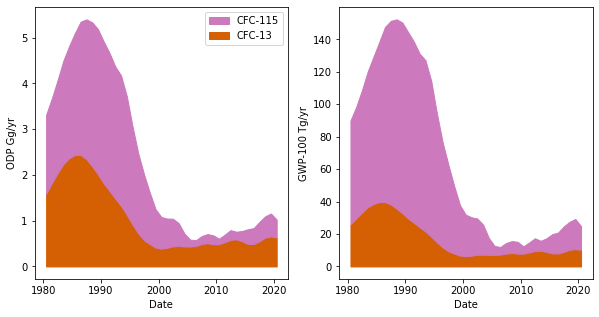

In [8]:
species_list = ["CFC-115", "CFC-13"][::-1] 
total_odp = pd.DataFrame(data = {"odp": np.zeros(41)},
                          index = np.arange(1980.5, 2020.51))
total_gwp = pd.DataFrame(data = {"gwp": np.zeros(41)},
                          index = np.arange(1980.5, 2020.51))

fig, ax = plt.subplots(1,2, figsize=(10,5))
for s, species in enumerate(species_list):

    dfodp = pd.DataFrame(data = {"odp":emissions[species]["emissions"].values*odps[species]},
                            index = emissions[species]["date"].values + 0.04).reindex_like(total_odp, method = "nearest")
    dfgwp = pd.DataFrame(data = {"gwp":emissions[species]["emissions"].values*gwps[species]*1e-3},
                            index = emissions[species]["date"].values + 0.04).reindex_like(total_gwp, method = "nearest")
    lowerodp = total_odp.odp.values
    lowergwp = total_gwp.gwp.values
    total_odp = total_odp.add(dfodp)
    total_gwp = total_gwp.add(dfgwp)
    ax[0].fill_between(total_odp.index,lowerodp, total_odp.odp.values, label=species, 
                        alpha=0.99, color=clrs[s+3])
    ax[1].fill_between(total_gwp.index,lowergwp, total_gwp.gwp.values, label=species, 
                        alpha=0.99, color=clrs[s+3])


handles, labels = ax[0].get_legend_handles_labels()
# labels[1] = "CFC-$\Sigma$114"
ax[0].legend(handles[::-1], labels[::-1],loc="upper right")
ax[0].set_ylabel("ODP Gg/yr")
ax[1].set_ylabel("GWP-100 Tg/yr")
ax[0].set_xlabel("Date")
ax[1].set_xlabel("Date")

# plt.savefig(f"/user/home/lw13938/work/minorCFCs/Figs/"+pd.to_datetime("today").strftime("%Y-%m-%d")+f"_odpgwp_agage-13-115_emissions.png", dpi=200)


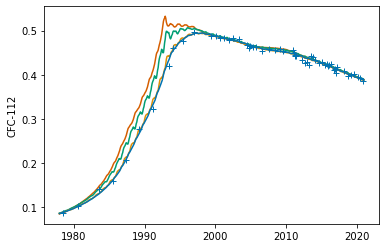

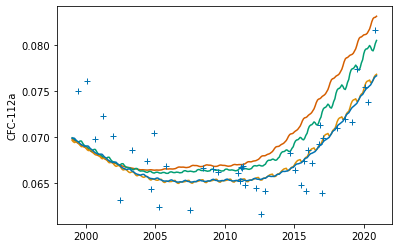

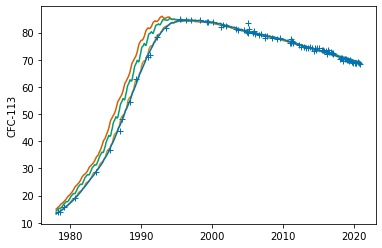

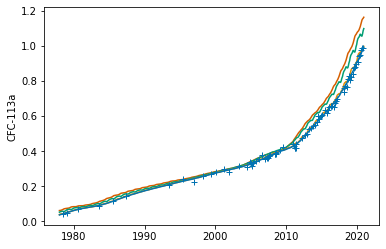

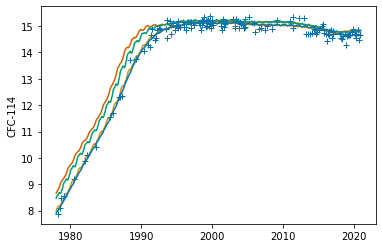

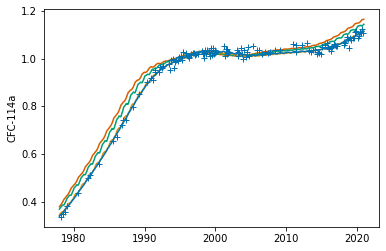

In [9]:
species_list = ["CFC-112", "CFC-112a", "CFC-113","CFC-113a", "CFC-114", "CFC-114a"]
lpath = Path("/user/home/lw13938/work/py12box_laube/data/")
emissions = {}

for species in species_list:

    df = pd.read_csv(lpath / species / f"outputs/{species}_Semihemispheric_modelled_mole_fractions.csv", comment="#")
    dfmf = pd.read_csv(lpath / species / f"outputs/{species}_Semihemispheric_mole_fractions.csv", comment="#")
    plt.figure()
    for i in range(4):
        plt.plot(df.Decimal_date, df[f"Semihemispheric_modelled_mole_fractions_box{i}"], color=clrs[3-i])
        plt.plot(dfmf.Decimal_date, dfmf[f"Semihemispheric_mole_fractions_box{i}"], "+", color=clrs[3-i])
        plt.ylabel(species)

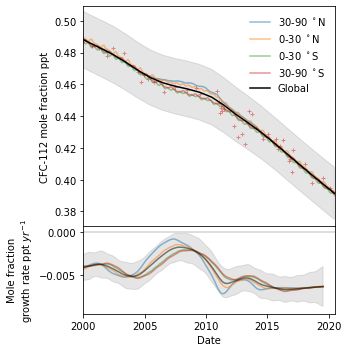

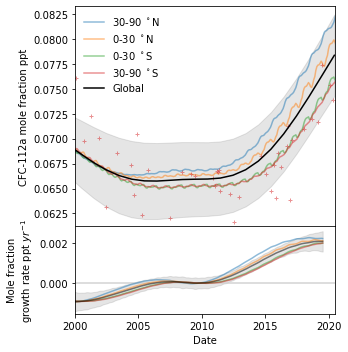

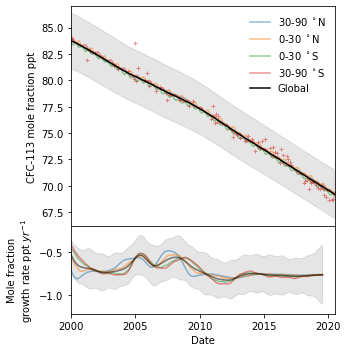

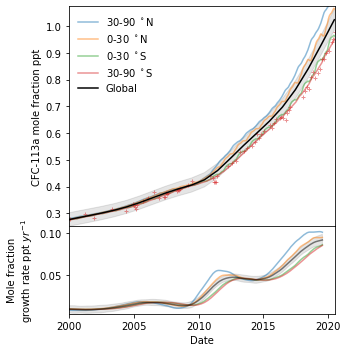

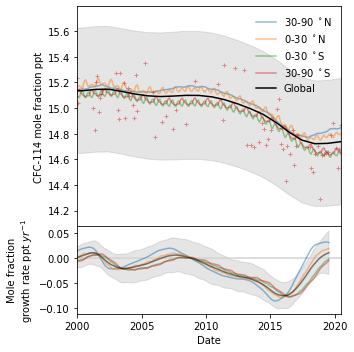

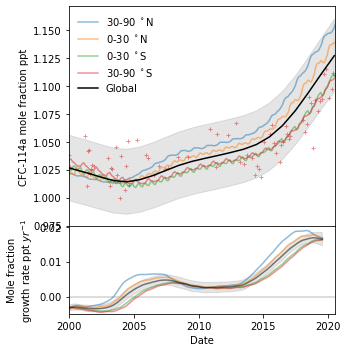

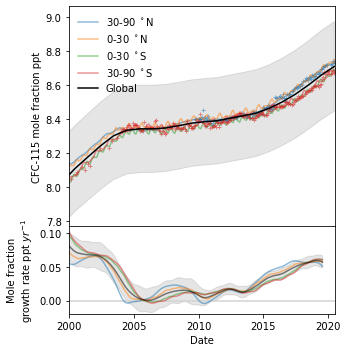

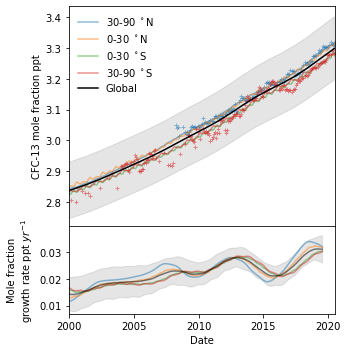

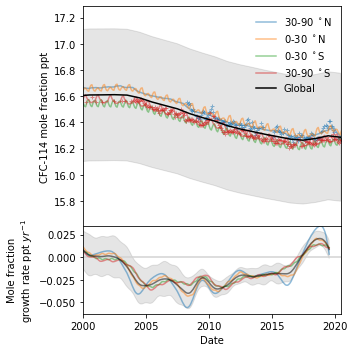

In [39]:
species_list = ["CFC-112", "CFC-112a", "CFC-113","CFC-113a", "CFC-114", "CFC-114a", "CFC-115", "CFC-13", "CFC-114"]
for s, species in enumerate(species_list):

    if s < 6:
        lpath = Path("/user/home/lw13938/work/py12box_laube/data/")
    else:
        lpath = Path("/user/home/lw13938/work/py12box_laube/data_agage/")

    agagemf_file = pd.read_csv(lpath / species / f"outputs/{species}_Semihemispheric_modelled_mole_fractions.csv",
                            comment="#",index_col=False)
    agageomf_file = pd.read_csv(lpath / species / f"outputs/{species}_Semihemispheric_mole_fractions.csv",
                            comment="#",index_col=False)
    agagegmf_file = pd.read_csv(lpath / species / f"outputs/{species}_Global_annual_mole_fraction.csv",
                            comment="#",index_col=False)
    agagegr_file = pd.read_csv(lpath / species / f"outputs/{species}_Semihemispheric_mole_fraction_growth_rate.csv",
                            comment="#",index_col=False)
    agageggr_file = pd.read_csv(lpath / species / f"outputs/{species}_Global_mole_fraction_growth_rate.csv",
                            comment="#",index_col=False)
    date = agagemf_file["Decimal_date"].values

    labels = ["30-90 $^\circ$N", "0-30 $^\circ$N", "0-30 $^\circ$S", "30-90 $^\circ$S"]

    fig, axes = plt.subplots(2, 1, figsize=(5,5), sharex='all', 
                gridspec_kw={'height_ratios': [1, 0.4], "hspace":0})
    ax = axes.flat[0]
    ax1 = axes.flat[1]

    # fig.subplots_adjust(hspace=0)
    # fig.subplots_adjust(wspace=0.1)
    # axins = inset_axes(ax, width="40%", height="40%", loc=4, borderpad=2)
    ax1.plot(np.linspace(date[0], date[-1],50), np.zeros(50), color="lightgrey")
    for i in range(4):
        p = ax.plot(date, agagemf_file['Semihemispheric_modelled_mole_fractions_box'+str(i)], alpha=0.5, label=labels[i])
        ax.plot(date, agageomf_file['Semihemispheric_mole_fractions_box'+str(i)], "+", alpha=0.5, label=None,
                color=p[0].get_color(), markersize=4)
        ax1.plot(agagegr_file["Decimal_date"].values, agagegr_file['Semihemispheric_mole_fraction_growth_rate_box'+str(i)], alpha=0.5)
        #axins1.plot(agagegr_file["Decimal_date"].values, agagegr_file['Semihemispheric_mole_fraction_growth_rate_box'+str(i)], alpha=0.5)
    for axi in [ax]: #, axins]:
        axi.plot(agagegmf_file["Decimal_date"].values, agagegmf_file["Global_annual_mole_fraction"], "k", label="Global")
        axi.fill_between(agagegmf_file["Decimal_date"].values, 
                        agagegmf_file["Global_annual_mole_fraction"]+agagegmf_file["Global_annual_mole_fraction_1-sigma"], 
                        agagegmf_file["Global_annual_mole_fraction"]-agagegmf_file["Global_annual_mole_fraction_1-sigma"],
                        facecolor="k",edgecolor="k",  alpha=0.1)
    for axi1 in [ax1]:
        axi1.plot(agageggr_file["Decimal_date"].values, agageggr_file['Global_mole_fraction_growth_rate'], "k", alpha=0.5)
        axi1.fill_between(agageggr_file["Decimal_date"].values, 
                        agageggr_file['Global_mole_fraction_growth_rate']+agageggr_file['Global_mole_fraction_growth_rate_1-sigma'],
                        agageggr_file['Global_mole_fraction_growth_rate']-agageggr_file['Global_mole_fraction_growth_rate_1-sigma'],
                        facecolor="k",edgecolor="k", alpha=0.1)


    ax.set_ylabel(f"{species} mole fraction ppt")
    ax1.set_ylabel("Mole fraction\ngrowth rate ppt $yr^{-1}$")
    ax1.set_xlabel("Date")
    ax.set_xlim(2000,2020.5)
    ax1.set_xlim(2000,2020.5)

    ymax_arr = agagegmf_file["Global_annual_mole_fraction"]+agagegmf_file["Global_annual_mole_fraction_1-sigma"]
    ymax = ymax_arr[agagegmf_file["Decimal_date"].values > 2000.].max() + ymax_arr[agagegmf_file["Decimal_date"].values > 2000.].max()*0.01
    ymin_arr = agagegmf_file["Global_annual_mole_fraction"]-agagegmf_file["Global_annual_mole_fraction_1-sigma"]
    ymin = ymin_arr[agagegmf_file["Decimal_date"].values > 2000.].min() - ymax_arr[agagegmf_file["Decimal_date"].values > 2000.].min()*0.01
    ax.set_ylim(ymin,ymax)

    ymax_arr = agageggr_file['Global_mole_fraction_growth_rate']+agageggr_file['Global_mole_fraction_growth_rate_1-sigma']
    ymin_arr = agageggr_file['Global_mole_fraction_growth_rate']-agageggr_file['Global_mole_fraction_growth_rate_1-sigma']
    ymax = ymax_arr[agageggr_file["Decimal_date"].values > 2000.].max() + \
        np.max([abs(ymax_arr[agageggr_file["Decimal_date"].values > 2000.].max()*0.1),abs(ymin_arr[agageggr_file["Decimal_date"].values > 2000.].min()*0.1)])
    ymin = ymin_arr[agageggr_file["Decimal_date"].values > 2000.].min() - abs(ymin_arr[agageggr_file["Decimal_date"].values > 2000.].min()*0.1)
    ax1.set_ylim(ymin,ymax)

    ax.legend(frameon=False)#, ncol=2) loc="upper left", 

    if s < 6:
        tag = ""
    else:
        tag = "-agage"

    fig.tight_layout()
    plt.savefig(f"/user/home/lw13938/work/minorCFCs/Figs/"+pd.to_datetime("today").strftime("%Y-%m-%d")+f"_{species}{tag}_mfgrowth.png", dpi=200)


In [31]:
# species_list = ["CFC-112", "CFC-112a", "CFC-113","CFC-113a", "CFC-114", "CFC-114a", "CFC-115", "CFC-13"]
species_list = ["CFC-115"]

for s, species in enumerate(species_list):

    if species != "CFC-13" and species != "CFC-115":
        lpath = Path("/user/home/lw13938/work/py12box_laube/data/")
    else:
        lpath = Path("/user/home/lw13938/work/py12box_laube/data_allagage/")

    agagegmf_file = pd.read_csv(lpath / species / f"outputs/{species}_Global_annual_mole_fraction.csv",
                            comment="#",index_col=False)
    agageggr_file = pd.read_csv(lpath / species / f"outputs/{species}_Global_mole_fraction_growth_rate.csv",
                            comment="#",index_col=False)
    date = agagegmf_file["Decimal_date"].values.astype(int)

    mf2010 = agagegmf_file["Global_annual_mole_fraction"][date == 2010].values
    mf2020 = agagegmf_file["Global_annual_mole_fraction"][date == 2020].values
    print(f"======{species}=======")
    print(f"2010 mf = {mf2010}")
    print(f"2020 mf = {mf2020}")
    print(f"Increased by {(mf2020-mf2010)/mf2010} %")

======CFC-115=======
2010 mf = [8.38105647]
2020 mf = [8.71078927]
Increased by [0.03934263] %


In [52]:
agageggr_file.Year.values[agageggr_file.Global_mole_fraction_growth_rate.argmin()] 

2000

In [23]:
species_list = ["CFC-13","CFC-115", "CFC-112a", "CFC-113a", "CFC-114a"][::-1] 

lpath = Path("/user/home/lw13938/work/py12box_laube/data_allagage/")
emissions = {}

for species in species_list:

    if species == "CFC-13" or species == "CFC-115":
        lpath = Path("/user/home/lw13938/work/py12box_laube/data_allagage/")
    else:
        lpath = Path("/user/home/lw13938/work/py12box_laube/data/")

    df = pd.read_csv(lpath / species / f"outputs/{species}_Global_annual_emissions.csv", comment="#")
    emissions[species] = {"date":df.Decimal_date, "emissions":df.Global_annual_emissions,
                            "sd":df["Global_annual_emissions_1-sigma"]} 

total_odp = pd.DataFrame(data = {"odp": np.zeros(41)},
                          index = np.arange(1980.5, 2020.51))
total__odp_sd = pd.DataFrame(data = {"odp": np.zeros(41)},
                          index = np.arange(1980.5, 2020.51))
total_gwp = pd.DataFrame(data = {"gwp": np.zeros(41)},
                          index = np.arange(1980.5, 2020.51))

for s, species in enumerate(species_list):

    dfodp = pd.DataFrame(data = {"odp":emissions[species]["emissions"].values*odps[species]},
                            index = emissions[species]["date"].values + 0.04).reindex_like(total_odp, method = "nearest")
    dfgwp = pd.DataFrame(data = {"gwp":emissions[species]["emissions"].values*gwps[species]*1e-3},
                            index = emissions[species]["date"].values + 0.04).reindex_like(total_gwp, method = "nearest")
    lowerodp = total_odp.odp.values
    lowergwp = total_gwp.gwp.values
    total_odp = total_odp.add(dfodp)
    total_gwp = total_gwp.add(dfgwp)





In [24]:
total_gwp

,gwp
1980.5,108.573782
1981.5,117.842171
1982.5,128.893799
1983.5,139.042610
1984.5,148.318784
1985.5,155.984206
1986.5,166.362660
1987.5,173.851598
1988.5,177.414125
1989.5,173.226941


In [25]:
print(f"total CFC11-eq emissions = {np.cumsum(total_odp[total_odp.index > 2010].values - 1.618948)}")

total CFC11-eq emissions = [ 0.01984622  0.55102812  1.32755968  2.04156037  2.78390896  3.74656581
  5.13208825  7.13552427  9.56527776 12.21273044 14.77552883]


In [26]:
print("Delay percent")
print(np.cumsum(total_odp[total_odp.index > 2010].values - 1.618948)[-1]/1e3*0.11)
print(np.cumsum(total_odp[total_odp.index > 2010].values - 1.618948)[-1]/1e3*1.) #Antarctic Spring
print(np.cumsum(total_odp[total_odp.index > 2010].values)[-1]/1e3*0.11)
print(np.cumsum(total_odp[total_odp.index > 2010].values)[-1]/1e3*1.) #Antarctic Spring

Delay percent
0.001625308171034219
0.014775528827583808
0.0035842352510342193
0.03258395682758381


In [40]:
# (total_odp.values[-1] - 1.618948)*10/1e3*0.11
# Assume emissions increase at same rate
np.cumsum(np.arange(1,11)/10 * (total_odp.values[-1] - 1.618948)/1.618948 + (total_odp.values[-1] - 1.618948))/1e3#*0.11

array([0.00259867, 0.00534852, 0.00824955, 0.01130176, 0.01450514,
       0.0178597 , 0.02136544, 0.02502236, 0.02883046, 0.03278973])

In [48]:
# GWP emissions
print(f"2020 CO2-eq emissions = {total_gwp.values[-1]}")
print(f"total CO2-eq emissions = {np.cumsum(total_gwp[total_gwp.index > 2010].values - 19.141712)[-1]}")


2020 CO2-eq emissions = [43.99875352]
total CO2-eq emissions = 155.9816930141301


In [51]:
def py_emissions(species):
    py_path = Path(f"/user/home/lw13938/work/OA22/AGAGE/{species}/outputs/{species}_Global_annual_emissions.csv")
    if py_path.exists():
        em_csv = pd.read_csv(py_path, comment="#",index_col=False)
        index = em_csv['Decimal_date'].values
        data = em_csv['Global_annual_emissions'].values[index < 2021.]
        data_sd = em_csv['Global_annual_emissions_1-sigma'].values[index < 2021.]
        return index[index < 2021.], data, data - data_sd, data + data_sd
    else:
        return None, None, None, None

Text(0.5, 0, 'Date')

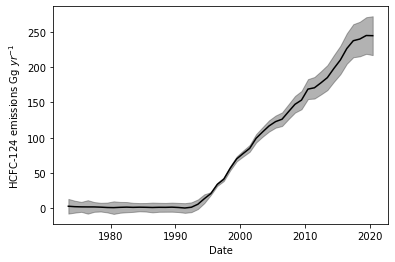

In [55]:
# py_index, py_data, py_data_low, py_data_up = py_emissions("HCFC-124")
py_index, py_data, py_data_low, py_data_up = py_emissions("HFC-134a")

plt.plot(py_index, py_data, label="HCFC-124", color="k")
plt.fill_between(py_index, py_data_low, py_data_up, alpha=0.3, color="k")
plt.ylabel("HCFC-124 emissions Gg $yr^{-1}$")
plt.xlabel("Date")
# plt.savefig(f"/user/home/lw13938/work/minorCFCs/Figs/"+pd.to_datetime("today").strftime("%Y-%m-%d")+f"_HCFC124_emissions.png", dpi=200)


In [27]:
species_list = ["CFC-112", "CFC-112a", "CFC-113","CFC-113a", "CFC-114", "CFC-114a", "CFC-115", "CFC-13", "CFC-114"]
for species in species_list:
    print(f"{species}: {gwps[species]}")
print("=====")
for species in species_list:
    print(f"{species}: {odps[species]}")

CFC-112: 4880
CFC-112a: 3740
CFC-113: 6900
CFC-113a: 4140
CFC-114: 9990
CFC-114a: 7850
CFC-115: 10200
CFC-13: 17200
CFC-114: 9990
=====
CFC-112: 0.98
CFC-112a: 0.86
CFC-113: 0.815
CFC-113a: 0.73
CFC-114: 0.5
CFC-114a: 0.72
CFC-115: 0.26
CFC-13: 1
CFC-114: 0.5


In [33]:
(0.6953546640219473-0.4941326960599926)/0.4941326960599926

0.4072225326646355